# <span style = 'color:Blue'> <center> PREDICTION OF ENERGY CONSUMPTION - TIME SERIES FORECASTING </center> </span>
---

## <span style = 'color:Orange'> <i> IMPORTING NECESSARY LIBRARIES </i> </span>
---

In [1]:
import warnings
import numpy as np
import pandas as pd

import seaborn as sns
colorPale = sns.color_palette()
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.metrics import mean_squared_error

---

## <span style = 'color:Orange'> <i> DATA EXTRACTION  </i> </span>
---

In [2]:
df = pd.read_csv('Dataset/PJME_hourly.csv')

---

## <span style = 'color:Orange'> <i> EXPLORATORY DATA ANALYSIS (EDA)  </i> </span>
---

### <span style = 'color:Indigo'> Initial Records of the Dataframe </span>
---

In [3]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


### <span style = 'color:Indigo'> Final Records of the Dataframe </span>
---

In [4]:
df.tail()

,Datetime,PJME_MW
145361,2018-01-01 20:00:00,44284.0
145362,2018-01-01 21:00:00,43751.0
145363,2018-01-01 22:00:00,42402.0
145364,2018-01-01 23:00:00,40164.0
145365,2018-01-02 00:00:00,38608.0


### <span style = 'color:Indigo'> Information about the Dataset </span>
---

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


### <span style = 'color:Indigo'> Setting the Datetime Feature as index </span>
---

In [6]:
df = df.set_index('Datetime')

### <span style = 'color:Indigo'> Type Conversion of the Datetime Feature </span>
---

In [7]:
df.index = pd.to_datetime(df.index)

### <span style = 'color:Indigo'> Visualisation of Energy Consumption by PJME </span>
---

<AxesSubplot:title={'center':'Energy Consumption by PJME in MW'}, xlabel='Datetime'>

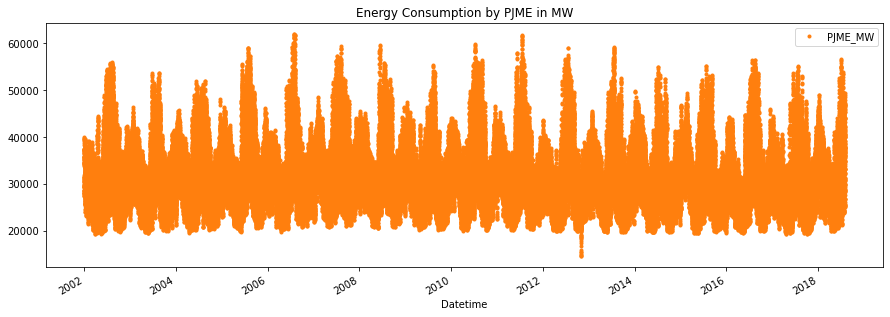

In [8]:
df.plot(style = '.', 
        figsize = (15,5), 
        color = colorPale[1], 
        title = 'Energy Consumption by PJME in MW')

---

## <span style = 'color:Orange'> Train and Test Split </span>
---

   * **The dateset will be split into <span style = 'color:Green'> Training </span> and <span style = 'color:Green'> Testing set </span>.**
   
   
   * **Training Data: It will contain records prior to January 2015.**
   
   
  * **Testing Data: It will contain all the records after from January 2015.**

In [9]:
trainData = df.loc[df.index < '01-01-2015']
testData = df.loc[df.index >= '01-01-2015']

### <span style = 'color:Purple'> <i> Visualisation of Traning and Testing Data </i> </span>
---

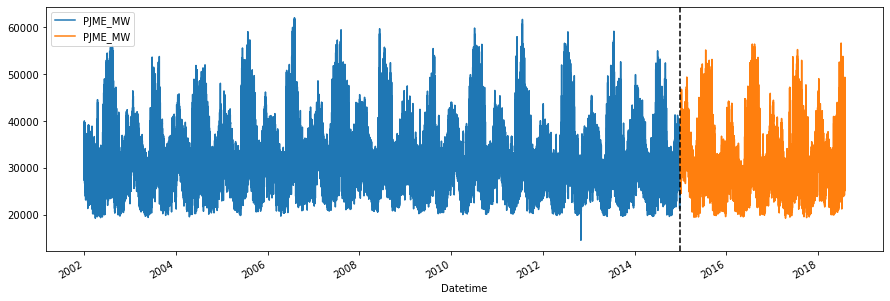

In [10]:
fig, ax = plt.subplots(figsize = (15, 5))
trainData.plot(ax = ax, label = 'Training Dataset')
testData.plot(ax = ax, label = 'Testing Dataset')
ax.axvline('01-01-2015', color = 'Black', ls = '--')
plt.show()

#### <span style = 'color:Green'> ➡️ Visualisation of a weeks data </span>
---

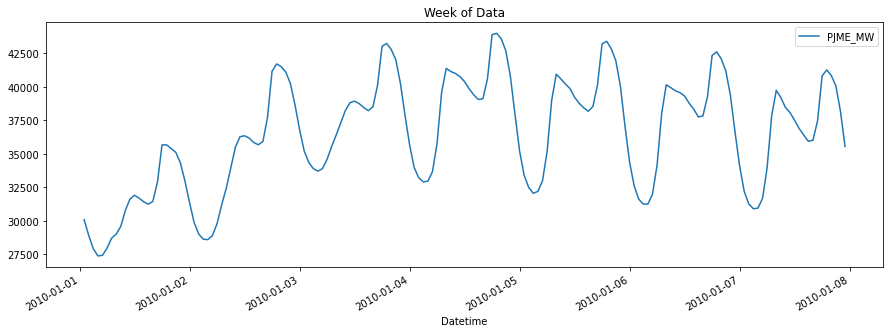

In [11]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')].plot(figsize = (15,5), title = 'Week of Data')
plt.show()

---

## <span style = 'color:Orange'> <i> Feature Creation </i> </span>
---

### <span style = 'color: Purple'> <i> Creation of time series features based on time series index </i> </span>
---

In [12]:
def createFeatures(df):
    
    df = df.copy()
    df['Hour'] = df.index.hour
    df['DayOfWeek'] = df.index.dayofweek
    df['Quarter'] = df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['DayOfYear'] = df.index.dayofyear
    return df

df = createFeatures(df)

### <span style = 'color: Purple'> <i> Visualisaiton of the relationship between Feature and Target </i> </span>
---

   <span style = 'color:Red'> **1. Energy Consumption by Hour.** </span>

Text(0.5, 1.0, 'Energy Consumption by Hour')

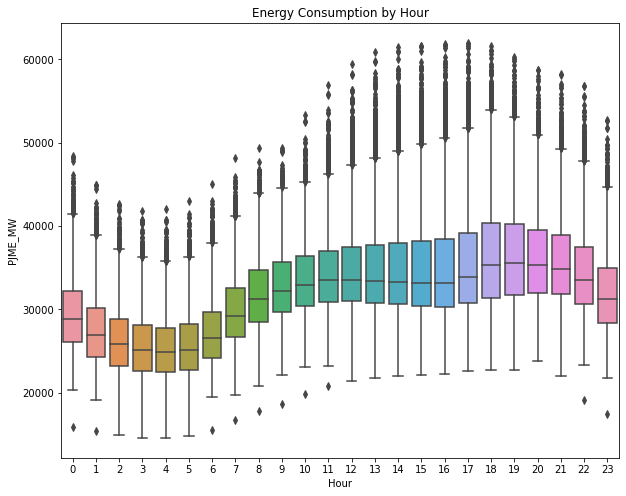

In [13]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data = df, x = 'Hour', y = 'PJME_MW')
ax.set_title("Energy Consumption by Hour")

<span style = 'color:Red'> **2. Energy Consumption by Month.** </span>

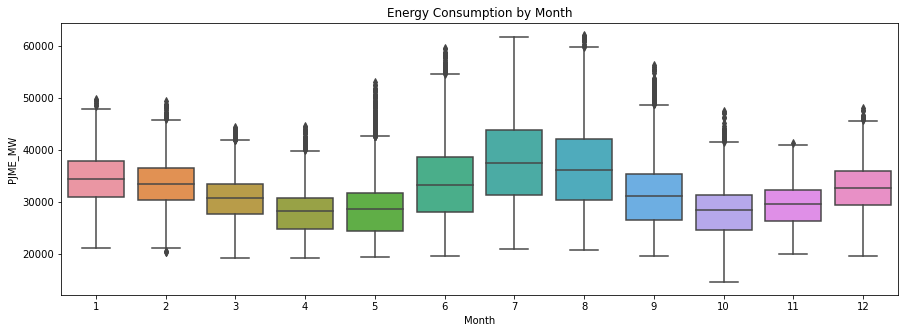

In [14]:
fig, ax = plt.subplots(figsize= (15,5))
sns.boxplot(data = df, x = 'Month', y = 'PJME_MW')
ax.set_title("Energy Consumption by Month")
plt.show()

In [15]:
trainData = createFeatures(trainData)
testData = createFeatures(testData)

In [16]:
FEATURES = ['Hour', 'DayOfWeek', 'Quarter', 'Month', 'Year','DayOfYear']
TARGET  = 'PJME_MW'           

In [24]:
X_train = trainData[FEATURES]
y_train = trainData[TARGET]

X_test = testData[FEATURES]
y_test = testData[TARGET]

---

## <span style = 'color:Orange'> <i> Model Creation </i> </span>
---

In [29]:
reg = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50,
                      learning_rate=0.01)
reg.fit(X_train, y_train, 
        eval_set = [(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:32601.87826	validation_1-rmse:31654.28935
[100]	validation_0-rmse:12342.17856	validation_1-rmse:11516.21767
[200]	validation_0-rmse:5373.20460	validation_1-rmse:5164.97392
[300]	validation_0-rmse:3375.48321	validation_1-rmse:3834.00707
[400]	validation_0-rmse:2884.85132	validation_1-rmse:3716.33146
[450]	validation_0-rmse:2771.93085	validation_1-rmse:3730.77469


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

---

## <span style = 'color:Orange'> <i> FEATURE IMPORTANCE </i> </span>
---

In [30]:
reg.feature_importances_

array([0.44880438, 0.1586678 , 0.03331862, 0.22815645, 0.02263376,
       0.10841895], dtype=float32)

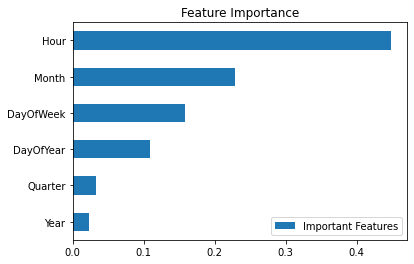

In [31]:
fi = pd.DataFrame(data=reg.feature_importances_,
            index = reg.feature_names_in_,
            columns = ['Important Features'])

fi.sort_values('Important Features').plot(kind = 'barh', title = 'Feature Importance')
plt.show()

---

## <span style = 'color:Orange'> <i> Forecast on the Test Dataset </i> </span>
---

In [32]:
testData['Predictions'] = reg.predict(X_test)

In [33]:
dfPredictions = df.merge(testData[['Predictions']] , how = 'left', left_index = True, right_index = True)
dfPredictions

,PJME_MW,Hour,DayOfWeek,Quarter,Month,Year,DayOfYear,Predictions
Datetime,,,,,,,,
2002-01-01 01:00:00,30393.0,1,1,1,1,2002,1,NaN
2002-01-01 02:00:00,29265.0,2,1,1,1,2002,1,NaN
2002-01-01 03:00:00,28357.0,3,1,1,1,2002,1,NaN
2002-01-01 04:00:00,27899.0,4,1,1,1,2002,1,NaN
2002-01-01 05:00:00,28057.0,5,1,1,1,2002,1,NaN
...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,44057.0,20,3,3,8,2018,214,40829.566406
2018-08-02 21:00:00,43256.0,21,3,3,8,2018,214,40358.277344
2018-08-02 22:00:00,41552.0,22,3,3,8,2018,214,39135.480469


### <span style = 'color:Purple'> Visualisation for Predictions </span>
---

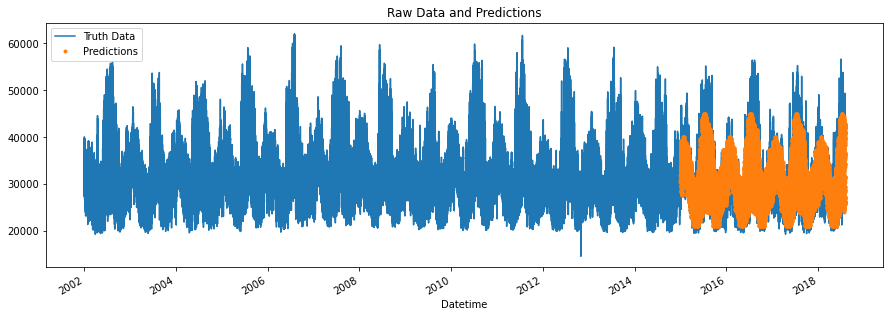

In [34]:
ax = df[['PJME_MW']].plot(figsize = (15,5))
dfPredictions['Predictions'].plot(ax = ax, style = '.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title("Raw Data and Predictions")
plt.show()

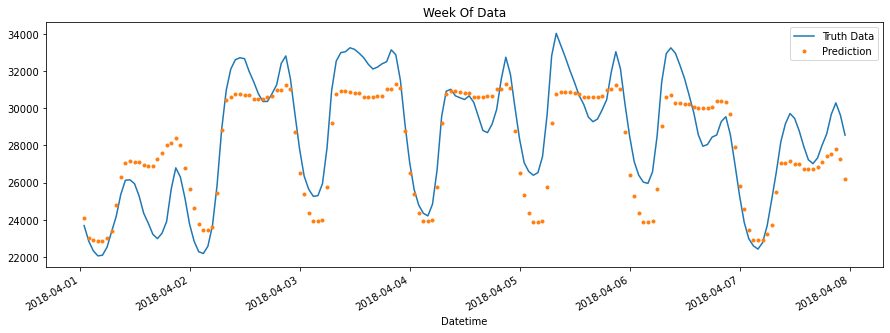

In [37]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['PJME_MW'] \
    .plot(figsize=(15, 5), title='Week Of Data')
dfPredictions.loc[(dfPredictions.index > '04-01-2018') & (dfPredictions.index < '04-08-2018')]['Predictions'] \
    .plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

### <span style = 'color:Purple'> Root Mean Squared Error on Test Data </span>
---

In [38]:
score = np.sqrt(mean_squared_error(testData['PJME_MW'], testData['Predictions']))
print(f"Root Mean Squared Error on Test Set : {score:0.2f}")

Root Mean Squared Error on Test Set : 3715.93


---

### <span style = 'color:Purple'> Calculate The Error </span>
---

In [39]:
testData['Error'] = np.abs(testData[TARGET] - testData['Predictions'])
testData['Date'] = testData.index.date
testData.groupby(['Date'])['Error'].mean().sort_values(ascending = False).head()

Date
2016-08-13    14577.210124
2016-08-14    14472.472738
2016-09-10    12494.880941
2016-08-12    11525.418376
2016-09-09    11369.640299
Name: Error, dtype: float64

---